
# Programming for Data Analysis Assignment 2018

This notebook revolves around the `numpy.random` package for Python and will touch on the following topics: 

1. Overall purpose of the package
2. Use of the “Simple random data” and “Permutations” functions
3. Use and purpose of “Distributions” function, as exemplified by  
    3.1 Univorm Distribution  
    3.2 Normal Distribution  
    3.3 Binomial Distribution  
    3.4 Poisson Distribution  
    3.5 Exponential Distribution  
    3.6 Triangular Distribution  
4. Use of seeds in generating pseudorandom numbers


In [27]:
#please run this to import the necessary packages for this notebook to keep the code concise

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

print("Thank you!")


Thank you!


## 1. Overall purpose of the package.

**NumPy** is a core package of the Python-based ecosystem of open-source software **SciPy**. NumPy is a library that enables users to work efficiently with arrays by providing handy features to define arrays and in-built fast math functions that operate on the array. *[1]* In this notebook, we will have a closer look at the **numpy.random** package of NumPy, which allows users to generate pseudorandom numbers.

Random numbers play an important role in computer science. They are needed for simulations and useful for testing applications and statistics. Imagine wanting to develop a game - how is the program going to determine the roll of the dice or how to shuffle cards? 

It has to be kept in mind that despite its name, `numpy.random` cannot generate truly random numbers, but pseudorandom numbers. Ronald T. Kneusel reminds the reader that John von Neumann had already established that "there is no such thing as a random number - there are only methods to produce random numbers" *[2, p.12]* and offers a definition: 

> A pseudorandom sequence is a deterministically generated sequence of numbers that is indistinguishable from a true random sequence of numbers *[2, p.11]*

The official documentation [official documentation of numpy.random](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html) outlines the different commands, what they do and how to use them. For the purpose of this assignment, I will provide illustrations of these commands.

### Resources:


    [1] https://wiki.python.org/moin/NumPy
    [2] Random Numbers and Computers, von Ronald T. Kneusel, Springer, 2018

## 2. Use of the “Simple random data” and “Permutations” functions.

As can be seen in the official documentation, `numpy.random` offers several ways to generate "simple random data" as well as "permutatiions". 
"Simple random data" allows the user to generate random values, samples, floats etc. whereas "permutations" offers ways to randomly change the sequence.

These functions work as follows

`rand(d0, d1, …, dn)` - returns values in a given shape according to the inputs in d0, d1... and draws from a uniform distribution over the half-open interval [0, 1)

A half-open interval means that one end of the interval in included, while the other endpoint is not. In this case, 0 is included, 1 isn't. [1]

In [3]:
np.random.rand(3,2) # will return values greater than or equal to 0 but lower than 1 in an array of floats in 3 rows, 2 values

array([[0.96110099, 0.16872791],
       [0.69592928, 0.33200407],
       [0.33167186, 0.06672931]])

`randn(d0, d1, …, dn)` - Return a sample (or samples) from the “standard normal” distribution with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1. As the mean is 0, this will also include negative numbers and stretch above 1.

In [4]:
np.random.randn(3,2)

array([[ 0.42857927, -2.91682511],
       [-1.56629964, -1.24050735],
       [ 2.6735793 ,  1.55954776]])

While I will get into more details on distributions in the next chapter, the following histograms of a larger sample size of these functions shows how different the outputs are, not only in the range of floats returned but also in how they are distributed.

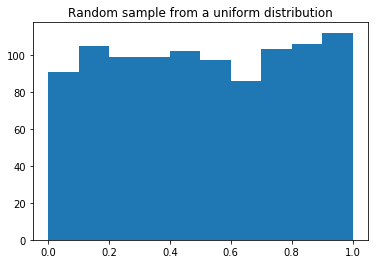

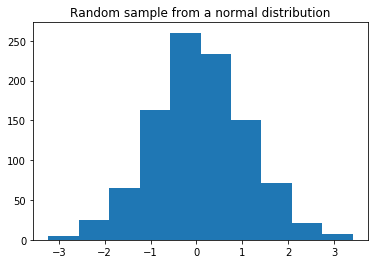

In [33]:
plt.hist(np.random.rand(1000))
plt.title("Random sample from a uniform distribution")
plt.show()
plt.hist(np.random.randn(1000))
plt.title("Random sample from a normal distribution")
plt.show()

`randint(low[, high, size, dtype])` - draw random integers  low (inclusive) to high (exclusive), set the size of the output array you want and add a dtype if desired.

In [6]:
x = np.random.randint(1,10,9)
#requested numpy.random to return an array of 9 random integers from 1 (inclusive) to 10 (exclusive) and store it in x
print(x)
#show the created array

[5 1 2 9 3 1 5 1 2]


`choice(a[, size, replace, p])` - is another useful random function that I wanted to touch on, because it works slightly differently. It will choose a random choice from a given array as illustrated below. replace can be set to true or false and will determine whether a sample is returned back into the pool to be chosen again or can only be chosen once [2] In p the probability of each item in the array to be chosen can be set (ensure they add up to 1), if left blank, it will assume a uniform distribution.

In [7]:
solution = np.random.choice(["love", "money", "chocolate", "coffee"], 1, replace = False)
print("Solution to problems:", solution)

Solution to problems: ['money']


By adding the p-value I can favor one choice over another, I have increased the sample size to visualize this functionality better and also turned on the replacement, as I want options to be able to be chosen over and over:

Solution to problems: ['coffee' 'chocolate' 'love' 'chocolate' 'love' 'coffee' 'coffee' 'love'
 'money' 'coffee' 'coffee' 'chocolate' 'love' 'money' 'chocolate' 'coffee'
 'coffee' 'coffee' 'coffee' 'coffee']


(array([10.,  0.,  0.,  4.,  0.,  0.,  4.,  0.,  0.,  2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

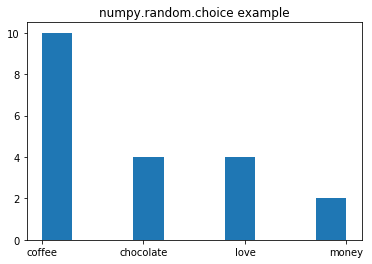

In [34]:
solution = np.random.choice(["love", "money", "chocolate", "coffee"], 20, p = [0.1, 0.1, 0.1, 0.7])
print("Solution to problems:", solution)

plt.title("numpy.random.choice example")
plt.hist(solution)

### Permutations

Similar to choice, permutations work on an input rather than generating values. Numpy.random gives two options: `.permutation(x)` and `.shuffle(x)`. The documentation reads, that shuffle shuffles the contents of a list in-place. It can be seen below, that permutation permutes the order for the instance in which it is used, while the actual list stays unaffected. Shuffle however, does not immediately print the results ('None') but instead shuffles the variable permanently.

In [20]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] #create list that is easy to recognize for demonstration purposes
print(np.random.permutation(x)) #print result of permutation
#requested to have the above array x permuted randomly
print(x) #print the list again to demonstrate it has not changed

print() #a bit of formatting
print("Now the same for the .shuffle()")
print(np.random.shuffle(x)) #Dissimilar to .permutation, shuffle will not print out x
print(x) #print the list again to show that it has permanently changed now

[8 6 2 4 3 9 7 5 1]
[1, 2, 3, 4, 5, 6, 7, 8, 9]

Now the same for the .shuffle()
None
[3, 2, 7, 8, 6, 1, 9, 5, 4]


### References

[1] http://mathworld.wolfram.com/Half-ClosedInterval.html  
[2] https://stackoverflow.com/questions/40689152/what-does-replacement-mean-in-numpy-random-choice

## 3. Use and purpose of “Distributions” functions

In Statistics, distributions are used to describe the probability of a certain outcome. As seen in the previous section, numpy is very efficient at generating pseudorandom data. I have touched on the uniform and normal distribution for two of the above examples and have shown histograms to illustrate what this means for the pseudorandom numbers that are generated. In this chapter, I am looking to give more insights into distributions and their real-life examples by presenting some of the inbuilt distributions from the numpy.random package.

Why can it be useful to draw samples from a particular distribution? To stay with the above already introduced examples, say you are writing a program that includes dice throws. In a fair game, you will want the probability for each number on the die to be the same - this constitutes a uniform distribution. On the other hand, you might want to simulate the results of an exam. From common knowledge, you will not expect an even distribution between all the grades, rather you would assume that the very good and very bad marks will be rare, whereas the majority of the class will fall around the middle-of-the-road marks. This would constitute a normal distribution.

Graphs are particularly useful when trying to gain insights into distributins, which is why I will show plots to all the numpy.random functions presented in this chapter. To give you an idea what the graphs of distributions look like, the following picture from the [Cloudera Engineering Blog](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/) gives a good overview:

<img src="http://blog.cloudera.com/wp-content/uploads/2015/12/distribution.png" width="700"/>

A full list of the available distributions can be found in the official documentation of [numpy.random](https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html).

### 3.1 Uniform distribution

In chapter 2 we have already looked at the `.rand()` function of the numpy sampling which draws from a uniform distribution. The distributions in the numpy.random package offer another way to draw pseudorandom samples from a distribution, which is `numpy.random.uniform([low, high, size])`. You can input the low value, the highest value and of course the sample size.

In a uniform distribution, all outcomes are equally likely, which is illustrated by the below histogram. Please note that we will not receive a perfect symmetry by random sampling, but it clearly shows that the values follow a uniform distribution pattern.

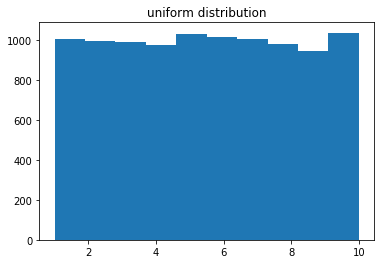

In [45]:
uniform = np.random.uniform(1,10, 10000) #assign to variable
plt.hist(uniform) # histogram to illustrate probability
plt.title("uniform distribution")
plt.show()

### 3.2 Normal Distribution

The normal distributions, also known as bell curve or Gaussian distribution, is what is referred to as a "continuous" distribution. This means, that between all values, there could theoretically be another value. Many natural processes or phenomena can be described with a normal distribution, such as the height of adult males or females or blood pressure values.

As I will illustrate, in the normal distribution most values are close to the mean of the distribution, which also shapes the characteristic bell curve.

`normal([loc, scale, size])` - loc refers to the mean of the distribution, scale to the standard deviation, which will determine the width of the distribution and size to the size of the array

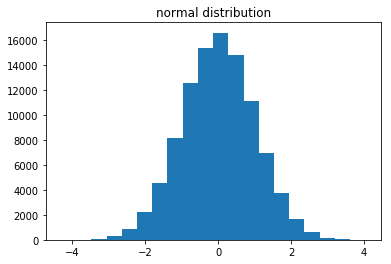

The mean is 0.0029797581744408124
The standard deviation is 0.9963972555095075


In [44]:
a, b = 0, 1
s = np.random.normal(a, b, 100000)

plt.hist(s, bins = 20)
plt.title("normal distribution")
plt.show()

#to illustrate, I will print out the meand and standard deviation to proof that the .normal function has in fact created a distribution around the input values a and b

print("The mean is", np.mean(s))
print("The standard deviation is", np.std(s))

### 3.3 Binomial distribution

The binomial distribution produces a bell-shape like the normal distribution if the sample size is large enough. However, they are not the same. 

I have outlined above, that a normal distribution is continous, which means, that in theory at least, there could be another data point between any two values. F.ex. when looking at the height of adult males. A binomial distribution is discrete, and looks at success or failure. There is no in-between outcome. An example is looking at the result of coin tosses. [1]

`binomial(n, p[, size])`	Draw samples from a binomial distribution., input the number of trials for n, the probability of success for each trial in p

Using the numpy.random.binomial generator, I am simulating, for a thousand times, the distribution of tossing a coin for 10 times and the likelyhood of tossing a Head. This experiment can only have one of two outcomes: Head or Tail, success or failure. Assuming a fair coin is used, the probability of success should be 50%, or 0.5.:

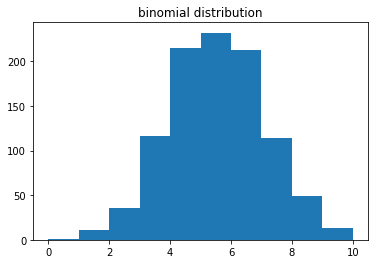

In [46]:
n, p = 10, .5  # number of trials, probability of each trial
a = np.random.binomial(n, p, 1000) #flipping coin 10 times, for a thousand times, storing results in a

plt.hist(a, bins = 10)
plt.title("binomial distribution")
plt.show()

As can be seen, this experiement creates a bell-curve. The plot shows that the experiment, on average, returned around 5 heads in 10 throws. The probability taperes off towards the edges.


### References

[1] http://staweb.sta.cathedral.org/departments/math/mhansen/public_html/23stat/handouts/normbino.htm

### 3.4 Poisson Distribution

"Poisson Distribution is applicable in situations where events occur at random points of time and space wherein our interest lies only in the number of occurrences of the event." [1]

1. Any successful event should not influence the outcome of another successful event.
2. The probability of success over a short interval must equal the probability of success over a longer interval.
3. The probability of success in an interval approaches zero as the interval becomes smaller."

Examples for this could be the number of calls in a callcenter within an hour, the number of babies born or customers to a restaurant.

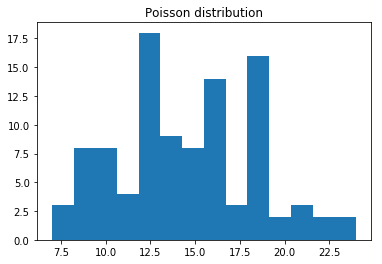

the mean of this distribution is: 14.56
the variance of this distribution is: 14.766399999999999


In [47]:
s = np.random.poisson(15, 100)
plt.hist(s, 14)
plt.title("Poisson distribution")
plt.show()

print("the mean of this distribution is:", np.mean(s))
print("the variance of this distribution is:", np.var(s))

The function needs the following arguments: `poisson([lam, size])`. lam stands for lambda. The lambbda is the average number of events in an interval [2] while size specifies how many samples should be drawn. With Lambda being the average number of events or rate, it is also equal to the mean and variance of the distribution [3]

It is worth noting the effect a larger sample size has on the random distribution compared to the one above:

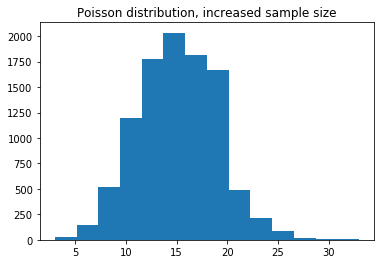

the mean of this distribution is: 14.9912
the variance of this distribution is: 14.990922560000001


In [48]:
s = np.random.poisson(15, 10000)
plt.hist(s, 14)
plt.title("Poisson distribution, increased sample size")
plt.show()

print("the mean of this distribution is:", np.mean(s))
print("the variance of this distribution is:", np.var(s))

### References

[1] https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/  
[2] https://en.wikipedia.org/wiki/Poisson_distribution 
[3] https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/basic-statistics/probability-distributions/supporting-topics/distributions/poisson-distribution/

### 3.5 Exponential distribution

While the Poisson distribution is applicable for random events within a certain interval of time, such as babies born within a day, an exponential distribution is applicable for the time between 2 events. The randomly generated data around this distribution can be useful to simulate failure rates.

The mean of these samples is 1718.0844330425775


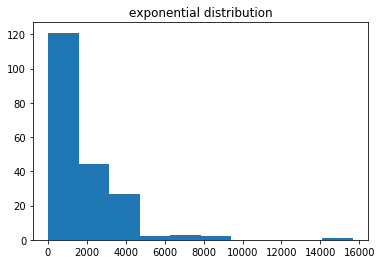

In [49]:
s = np.random.exponential(2000, 200)
plt.hist(s)
plt.title("exponential distribution")
print("The mean of these samples is", np.mean(s))
plt.show()

### 3.6 Triangular Distribution

`triangular(left, mode, right[, size])` - Draw samples from the triangular distribution over the interval [left, right].

The triangular distribution takes 3 arguments: the lowest limit to 'left',the highest limit value to the 'right'and the peak value at 'mode'. As can be seen below, by generating 1000000 random samples from a triangle distribution in numpy, the distribution forms a distinctive triangle shape. 

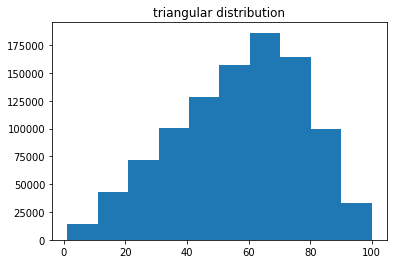

C:\Users\sarah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


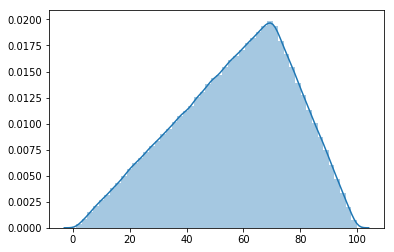

In [50]:
s = np.random.triangular(1,70,100,1000000)
plt.hist(s)
plt.title("triangular distribution")
plt.show()

n = [np.random.triangular(1,70,100) for i in range(1000000)]
sb.distplot(n)
plt.show()

A real-life example of a triangular distribution is the throw of two dice. The below simulates 10000 throws of two dice and plots the list:

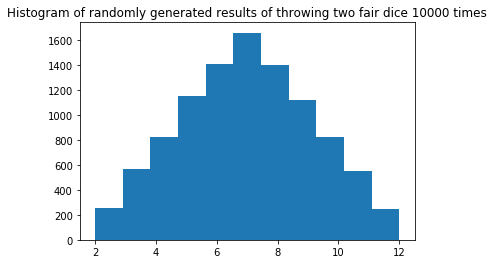

In [51]:
n = 10000 #throw the dice n-times
a = [] #define a as a list

for i in range(n):
    x=np.random.randint(1,7) #use numpy.random to simulate the throw of a dice
    y=np.random.randint(1,7) #use numpy.random to simulate the throw of a second dice
    a.append(x+y) #collect all results in a


plt.hist(a, bins = 11)
plt.title("Histogram of randomly generated results of throwing two fair dice 10000 times")
plt.show()

## 4. Use of seeds in generating pseudorandom numbers.

We have seen in numerous examples, how pseudorandom number generators (PRNG) can be useful for simulations. Not only does the numpy.random package offer the functionalities to create pseudorandom values or permutate existing values in a pseudorandom manner but also offers functions by which to pull pseudorandom values according to a particular distribution.

The use of a seed can be useful if one if looking to replicate results, for example to test codes against each other. As was outlined above, a computer cannot generate random numbers. It follows an algorithm that produces what will appear to be random numbers. When an internal random number generator is initialised, the so-called random state is initialized. 
A this point, depending on the application, a certain starting value will be used from which to start the random number generation, this might for example be derived from the time the random state was invoked. For example, numpy uses the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) to generate pseudorandom numbers.

In [1]:
random=input("enter an integer")

enter an integer10


In [3]:
pseudo=int(random) + 6 * 758 - 5
print("Your pseudorandom result is:", pseudo)

Your pseudorandom result is: 4553


This, admittedly very simplified, example shows not only how the initialization of the random state produces values but also let's one draw the conclusion that with the same input, the outputs would be same. By seeding the generator, one can ensure consistent pseudorandom numbers.

In [243]:
#run this command several times to see that the numbers change everytime
print(np.random.randint(1,10,10))

[4 1 7 6 7 5 7 7 3 3]


In [30]:
#seeding the generator, run this command several times to see that the numbers won't change
np.random.seed(1)
print(np.random.randint(1,10,10))
print(np.random.randint(1,10,10))

[6 9 6 1 1 2 8 7 3 5]
[6 3 5 3 5 8 8 2 8 1]


In [31]:
#by using the same seed, I can ensure the same numbers are returned
np.random.seed(1)
print(np.random.randint(1,10,20))

[6 9 6 1 1 2 8 7 3 5 6 3 5 3 5 8 8 2 8 1]


Be wary to not use a seed or the numpy.random package to generate passwords or security keys as they can be reverse engineered. Python offers a different package called [secrets](https://docs.python.org/3/library/secrets.html) which is considered cryptographically strong as it uses sources from the operating system which makes it slower, but less predictable. [1]

### References

[1] Cracking Codes with Python: An Introduction to Building and Breaking Ciphers, Al Sweigart